<a href="https://colab.research.google.com/github/khldsqmr/EPA-Vehicle-Data-Analysis/blob/main/Vehicle_Data_Analysis_Khalid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**University of Waterloo** \
Name: **Khalid Shaikh Qamar** \
Student ID: **20801907** \
Contact: **548-333-6090** \
Email: **kshaikhq@uwaterloo.ca**

# **Vehicle Data Analysis (EPA Data)**

Scroll down for analyses and answers related to the following questions:
1. Which manufacturer produces the most fuel-efficient fleet of cars?
2. Build a model to predict City MPG (variable “UCity” in column BG). Based on the model,
how would you design a car that has the best possible City MPG?
3. How has fuel economy changed over time? Are there any other interesting insights or
trends?


**Upload** the vehicle.csv file located on the url https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vehicles.csv to vehicles.csv


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
!pip install heatmapz
from heatmap import heatmap, corrplot
import io
import seaborn as sns; sns.set()

The Vehicle dataset is now stored in a Pandas Dataframe using the following code:

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['vehicles.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Exploring the data**


In [ ]:
#df.head(5)

In [ ]:
df.shape

(42295, 83)


Check for the rows containing duplicate data, and remove them. 
For our initial analysis, we are considering the variables feScores and mfrCode. \

Check for the null values and remove them (executed under the question 1 section) \

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df1=df
df = df.drop(df[df.feScore == -1].index)
df.shape

number of duplicate rows:  (0, 83)


(10268, 83)



---


# **Question 1: Which manufacturer produces the most fuel-efficient fleet of cars?**


---

\
Based on our analysis and the following plots, we observe that the most fuel-efficient fleet of cars are produced by **BYD**, **TSL** and **CDA** having Fuel Economy Score of 10. 

**BYD:** produces BYD \
**TSL:** produces Tesla \
**CDA:** produces CODA Automotive \

The **Fuel Economy Score** is calculated on the 0-10 scale to compare environmental performance across vehicle classes. Larger numbers, whether emissions score or fuel economy, are more environmentally friendly than smaller numbers. \



In [ ]:
var_feScore = df.groupby('mfrCode')['feScore'].mean()
var_feScore.sort_values(ascending=False).head(5)

mfrCode
BYD    10.000000
TSL    10.000000
CDA    10.000000
KAL     8.666667
FTG     7.000000
Name: feScore, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

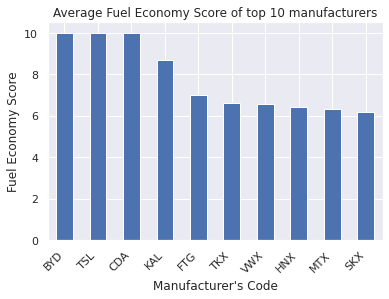

In [ ]:
var_feScore.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Fuel Economy Score')
plt.title('Average Fuel Economy Score of top 10 manufacturers')
plt.xlabel('Manufacturer\'s Code')
plt.xticks(rotation=45, horizontalalignment='right')

In the following analysis and plots, we observe that the most fuel-efficient fleet of cars are **CODA Automotive**, **BYD**, and **Tesla** having Fuel Economy Score of 10.

In [ ]:
var_make_feScore = df.groupby('make')['feScore'].mean()
var_make_feScore.sort_values(ascending=False).head(5)

make
CODA Automotive    10.000000
BYD                10.000000
Tesla              10.000000
smart               9.230769
Karma               8.666667
Name: feScore, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

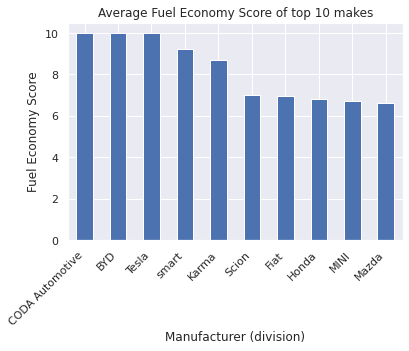

In [ ]:
var_make_feScore.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Fuel Economy Score')
plt.title('Average Fuel Economy Score of top 10 makes')
plt.xlabel('Manufacturer (division)')
plt.xticks(rotation=45, horizontalalignment='right')


---


# **Question 2: Build a model to predict City MPG (variable “UCity” in column BG). Based on the model, how would you design a car that has the best possible City MPG?**


---

\
The MPG of a car depends on various parameters. Since, we are determined to design a car that has the best possible MPG, we consider several design parameters associated with the car such as the number of engine cylinders, engine displacement in liters, transmission etc, along with other numeric variables that are relevant for our analysis.

## **Feature Selection**

The dataset is diverse, and we select the features based on several methods such as visual selection, correlation heatmap observations, and plot inspection. Since EPG Fuel Economy Score is missing for ample number of cars models, we will not consider **feScore** variable, but try to select the variables based on our ad-hoc analysis. The correlation heatmap is as followed: 



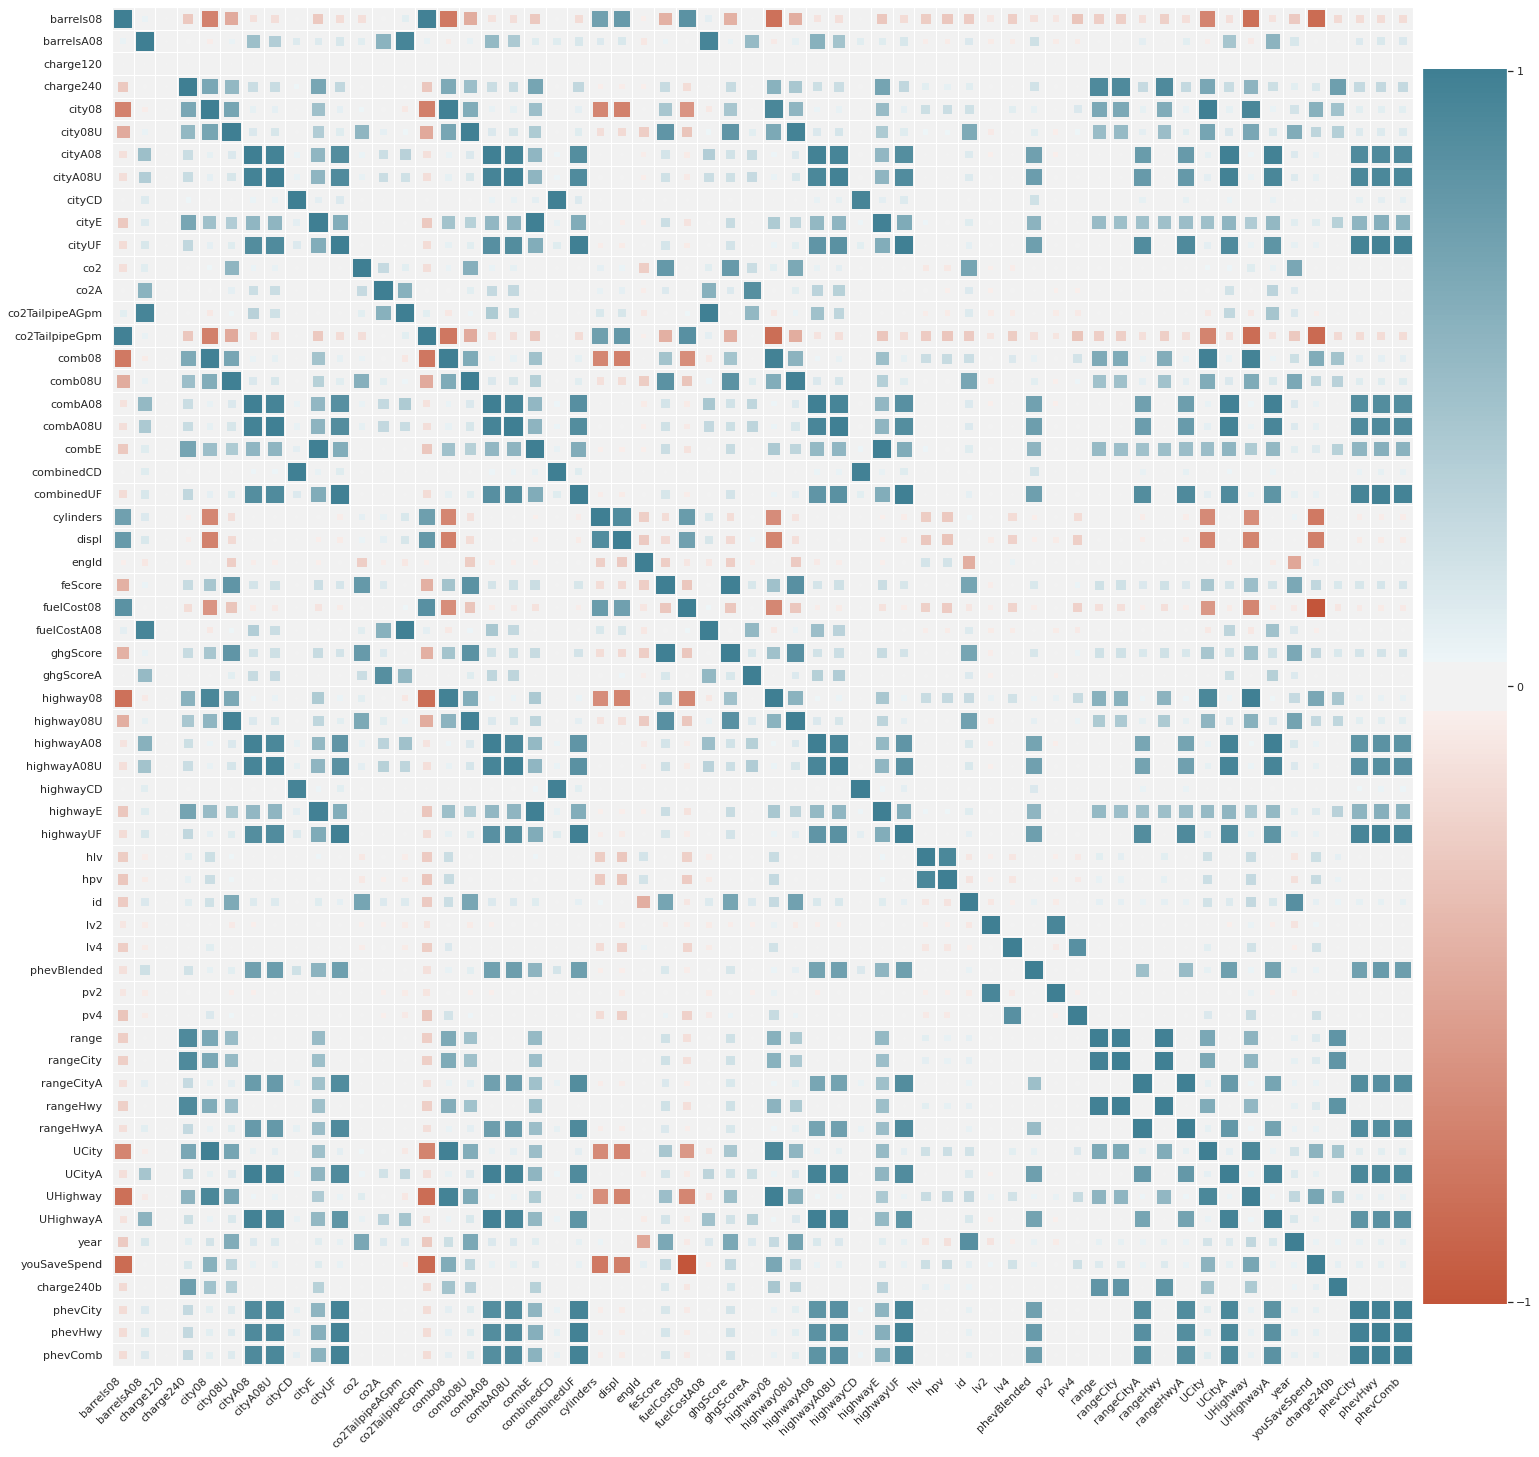

In [ ]:
plt.figure(figsize=(25,25))
corrplot(df1.corr(), size_scale=300);

We remove the variables that are highly correlated with each other. For eg: in case of ***YouSaveSpend*** and ***fuelCost08***, there is high negative correlation, and we eliminate one of them which has one of more correlation with other variables. \
Similarly, the variables such as ***barrels08***, ***feScore*** and ***co2TailpipeGpm*** are relevant to our model building and simultaneously, highly correlated. Hence, we will only consider ***co2TailpipeGpm***, and remove ***barrels08*** and ***feScore*** variables.\
Based on the analysis, the following variables are selected:

In [ ]:
dfNew = df1[["cylinders", "displ","drive","fuelType", "trany",	"UCity", "co2TailpipeGpm"]]
dfNew.head(5)

,cylinders,displ,drive,fuelType,trany,UCity,co2TailpipeGpm
0,4.0,2.0,Rear-Wheel Drive,Regular,Manual 5-spd,23.3333,423.190476
1,12.0,4.9,Rear-Wheel Drive,Regular,Manual 5-spd,11.0000,807.909091
2,4.0,2.2,Front-Wheel Drive,Regular,Manual 5-spd,29.0000,329.148148
3,8.0,5.2,Rear-Wheel Drive,Regular,Automatic 3-spd,12.2222,807.909091
4,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,Manual 5-spd,21.0000,467.736842


In [ ]:
dfNew.shape

(42295, 7)

## **Data Transformation**

Let's transform the categorical variables to make them suitable for our linear regression analysis. This is because UCity is a numeric variable, and we have to add dummy variables for our numerical variables. in case of **trany** variable, we split it into TWO major categories i.e., Manual and Automatic.

In [ ]:
dfNew['trany'] = dfNew['trany'].astype(str).apply(lambda x: x.split()[0])
dfNew.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cylinders,displ,drive,fuelType,trany,UCity,co2TailpipeGpm
0,4.0,2.0,Rear-Wheel Drive,Regular,Manual,23.3333,423.190476
1,12.0,4.9,Rear-Wheel Drive,Regular,Manual,11.0000,807.909091
2,4.0,2.2,Front-Wheel Drive,Regular,Manual,29.0000,329.148148
3,8.0,5.2,Rear-Wheel Drive,Regular,Automatic,12.2222,807.909091
4,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,Manual,21.0000,467.736842


Check for no perfect multicollinearity (predictor variables should not correlate highly). Since our dataset is diverse, the VIF Values may not be appropriate due to ample number of variables correlated in one form or the other. However, the variables are chosen in a way that it shouldn't exhibit multicollinearity for the purpose of model building.

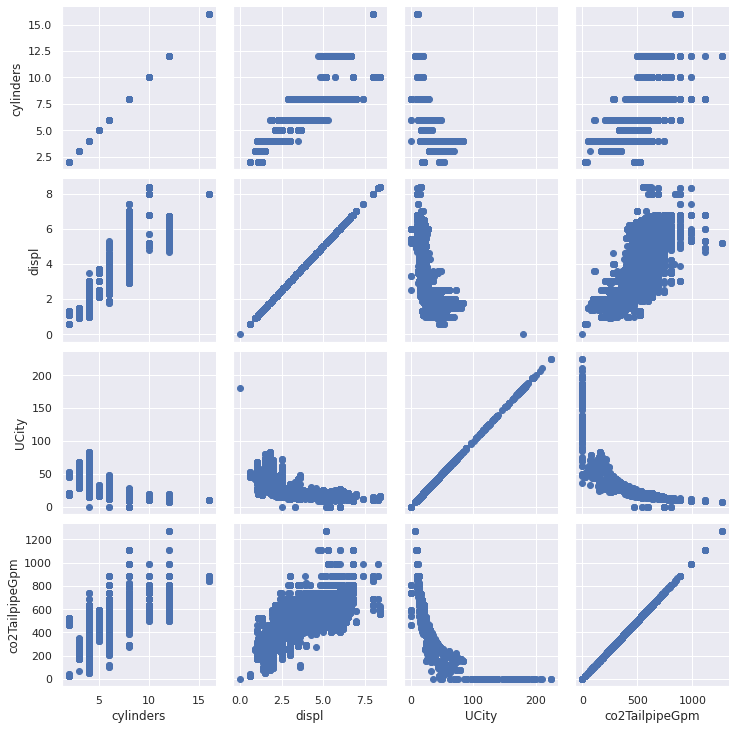

In [ ]:
grids = sns.PairGrid(dfNew)
grids.map(plt.scatter)

The categorical variables i.e., **drive**, **fuelType** and **trany** are deleted from the dataset after they are introduced as the dummy variables in our analysis. 

In [ ]:
driveDummy=pd.get_dummies(dfNew['drive'], drop_first=True)
fuelTypeDummy=pd.get_dummies(dfNew['fuelType'], drop_first=True)
tranyDummy=pd.get_dummies(dfNew['trany'], drop_first=True)

dfNew1 = pd.concat([dfNew, driveDummy, fuelTypeDummy, tranyDummy],axis = 1 )
dfNew1 = dfNew1.drop(['drive', 'fuelType', 'trany','nan'], axis=1)
dfNew1.head(5)

,cylinders,displ,UCity,co2TailpipeGpm,4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive,Diesel,Electricity,Gasoline or E85,Gasoline or natural gas,Gasoline or propane,Midgrade,Premium,Premium Gas or Electricity,Premium and Electricity,Premium or E85,Regular,Regular Gas and Electricity,Regular Gas or Electricity,Manual
0,4.0,2.0,23.3333,423.190476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,12.0,4.9,11.0000,807.909091,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,4.0,2.2,29.0000,329.148148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,8.0,5.2,12.2222,807.909091,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.0,2.2,21.0000,467.736842,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
dfNew1 = dfNew1.dropna() 
print(dfNew1.isnull().sum())
#dfNew1.count()

cylinders                      0
displ                          0
UCity                          0
co2TailpipeGpm                 0
4-Wheel Drive                  0
4-Wheel or All-Wheel Drive     0
All-Wheel Drive                0
Front-Wheel Drive              0
Part-time 4-Wheel Drive        0
Rear-Wheel Drive               0
Diesel                         0
Electricity                    0
Gasoline or E85                0
Gasoline or natural gas        0
Gasoline or propane            0
Midgrade                       0
Premium                        0
Premium Gas or Electricity     0
Premium and Electricity        0
Premium or E85                 0
Regular                        0
Regular Gas and Electricity    0
Regular Gas or Electricity     0
Manual                         0
dtype: int64


In [ ]:
dfNew1.shape

(42054, 24)

## **Assumptions to be tested Prior to constructing the model**



1.   **All predictor variables must be quantitative or categorical, and outcome must be quantitative, continuous, and unbounded:** All predictor variables are quantitative while ***drive***, ***fuelType*** and ***trany*** are categorical variables. ***Cylinders*** is an ordinal categorical variable in the range 2-16. However, for the purpose of analysis we are assuming that the Engine Cylinders is a continuous interval variable.
2.   **Predictor variables are not highly correlated with any other variable in the dataset:** As seen by the correlation matrix above, we proceed by considering our predictor variables as not being highly correlated with any other predictors in the dataset.
3.   **Predictor variables are uncorrelated with external variables:** We have not been able to test whether there are external variables because of the diversity of the dataset. We thus assume that these are the only relevant variables under consideration.
4.   **Checking non-zero variance between UCity and drive groups (Using Levene Test):** The null and alternative hypotheses of Levene's test can be generally stated as follows:\
H0: All of the k sample populations have equal variances.\
HA: At least one of the k sample population variances are not equal. 

In [ ]:
from scipy.stats import levene
statistic, p_value = levene(dfNew1['UCity'] , dfNew1['cylinders'],center="median")
p_value

0.0

Here, p=0.0 is non-significant for the UCity variable at 0.01 level of significance (the value in the Pr (>F) column is more than .01). This indicates that the variances are similar between groups and the homogeneity of variance assumption is applicable. 

## **Building the Regression model**



**Note:** R-squared will be reduced as we are reducing the number of predictor variables, but it was important to remove variables with high multicollinearity and p values > 0.05 level of significance


In [ ]:
Y = dfNew1["UCity"]
X = dfNew1.drop(["UCity"], axis=1)
Xdata = X.values
Ydata = Y.values
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(Xdata,Ydata, test_size=0.2, random_state=42)

from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

yPred = regr.predict(xTest)
d = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})
d

,Actual,Predicted
0,18.7547,18.023177
1,21.0000,22.615891
2,33.1000,31.245596
3,29.0000,28.923739
4,22.0000,25.565911
...,...,...
8406,28.1000,28.828324
8407,29.5858,29.039764
8408,18.8889,20.027327
8409,18.8889,21.009766


## **Model Summary**

In [ ]:
# with statsmodels
x = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     6981.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:28:00   Log-Likelihood:            -1.0931e+05
No. Observations:               42054   AIC:                         2.187e+05
Df Residuals:                   42031   BIC:                         2.189e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The Durbin-Watson test for independent errors was significant at 5% level of significance. Despite d=1.307 which doesn’t imply autocorrelation, a significantly small p-value (p=0) casts doubt on the validity of the null hypothesis and indicates autocorrelation among residuals. This implies that the model has not accounted for all signals and thus, it consists of signal plus noise.

Multiple ***R-squared value is 0.785*** and ***Adjusted R- squared value is 0.785***. Hence, this model explains **78.5%** variance in the UCity (City MPG) and generalizes the population as well. The remaining 21.5% remains unexplained. 

## **Based on the model, the best possible City MPG will have the designs based on the coefficients of the linear regression model.**

As a summary, the best possible City MPG could be provided by the car having the following features:
*   Cylinders: **No greater than 3**
*   Displ: **No greater than 1**
*   Fuel Type: **Electricity (Hybrid)**
*   Drive Type: **Front-Wheel Drive**
*   Transmission: **Manual** 

These features can also be determined by exploring the dataset graphically by understanding trends and insights. \

Furthermore, based on the coefficients, we observe that: \
* The ***cylinders*** variable is positive, and will caste positive effect towards City MPG increment. \
* The ***displ*** variable is negative (and approx. 0), and will caste nil/negative effect towards City MPG increment. 
\

Hence, we try to understand the relationship between ***UCity*** (**City MPG for Fuel Type 1**) and predictor variables ***cylinders*** and ***displ*** by plotting the graphs as shown below:


[Text(0, 0.5, 'City MPG (UCity Variable)'),
 Text(0.5, 0, 'Engine Displacement in Liters')]

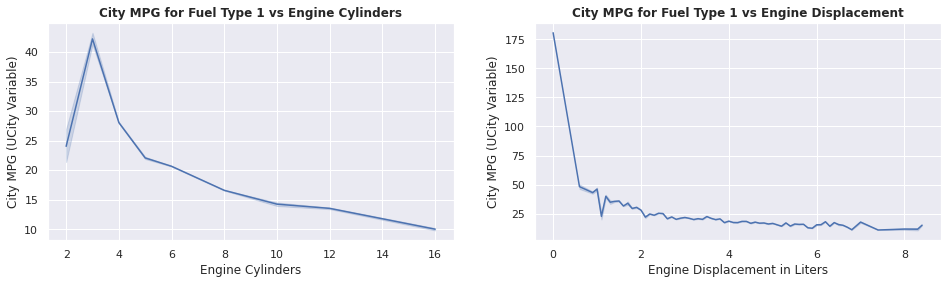

In [ ]:
import matplotlib.pylab as plt
df2 = df1 #dataframe created for plotting purpose
df2['trany'] = df2['trany'].astype(str).apply(lambda x: x.split()[0])
df2 = df2.drop(df2[df2.trany == 'nan'].index)
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
ax11 = sns.lineplot(x="cylinders", y="UCity", data=df2)
ax11.axes.set_title("City MPG for Fuel Type 1 vs Engine Cylinders",fontweight='bold')
ax11.set(xlabel='Engine Cylinders', ylabel='City MPG (UCity Variable)')
plt.subplot(1, 2, 2)
ax12 = sns.lineplot(x="displ", y="UCity", data=df2)
ax12.axes.set_title("City MPG for Fuel Type 1 vs Engine Displacement",fontweight='bold')
ax12.set(xlabel='Engine Displacement in Liters', ylabel='City MPG (UCity Variable)')


As we observe from the above graph, the City MPG **reduces** as the Engine Cylinders **increases**. Thus, the best MPG can be observed with the vehicles having 3 engine cylinders, and subsequently, could have less than the maximum MPG values with 4 and 6 cylinders.

## **The following graphs demonstrate the City MPG values on categorical variables such as fuel types and drive types** 


[Text(0, 0, 'Rear-Wheel Drive'),
 Text(0, 0, 'Front-Wheel Drive'),
 Text(0, 0, '4-Wheel or All-Wheel Drive'),
 Text(0, 0, 'All-Wheel Drive'),
 Text(0, 0, '4-Wheel Drive'),
 Text(0, 0, 'Part-time 4-Wheel Drive'),
 Text(0, 0, '2-Wheel Drive')]

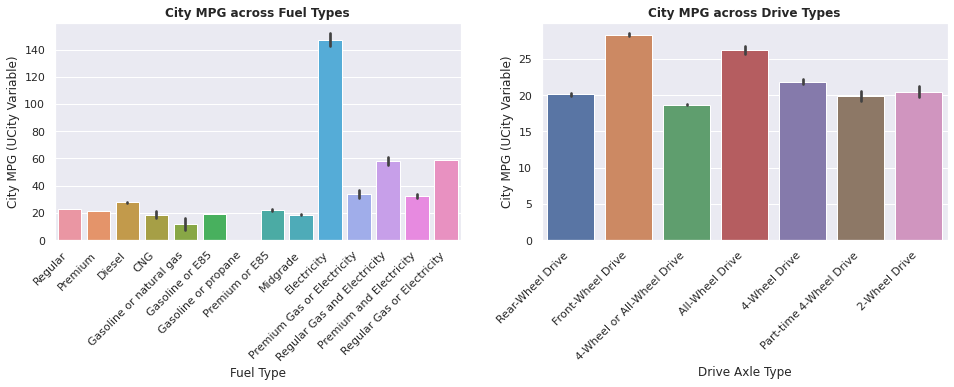

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
ax14 = sns.barplot(x="fuelType", y="UCity", data=df2)
ax14.axes.set_title("City MPG across Fuel Types",fontweight='bold')
ax14.set(xlabel='Fuel Type', ylabel='City MPG (UCity Variable)')
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
ax15 = sns.barplot(x="drive", y="UCity", data=df2)
ax15.axes.set_title("City MPG across Drive Types",fontweight='bold')
ax15.set(xlabel='Drive Axle Type', ylabel='City MPG (UCity Variable)')
ax15.set_xticklabels(ax15.get_xticklabels(), rotation=45, horizontalalignment='right')

Here, we observe that the maximum City MPG is observed in case of ***Hybrid Vehicles***. \
As far as the drive types are concerned, the maximum City MPG is observed in case of ***Front-wheel drive***, followed by ***All-wheel drive***.

## **The following graph demonstrates the City MPG with respect to engine cylinders across the two major transmission types (Automatic and Manual)**

[Text(0, 0.5, 'City MPG (UCity Variable)'), Text(0.5, 0, 'Engine Cylinders')]

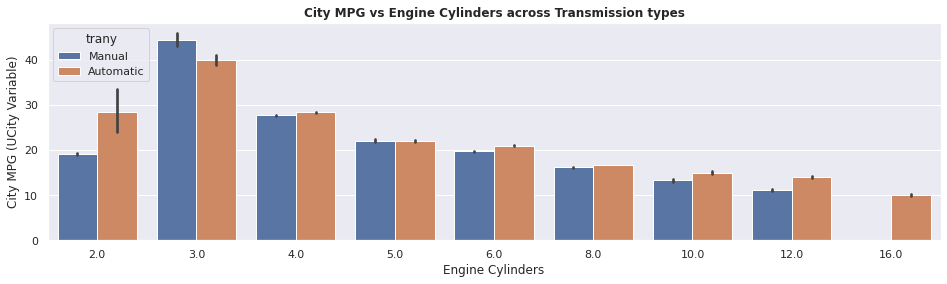

In [ ]:
plt.figure(figsize=(16,4))
ax13 = sns.barplot(x="cylinders", y="UCity", hue="trany", data=df2)
ax13.axes.set_title("City MPG vs Engine Cylinders across Transmission types",fontweight='bold')
ax13.set(xlabel='Engine Cylinders', ylabel='City MPG (UCity Variable)')

Here we observe that the City MPG isn't much affected by the transmission type. In both the cases (Automatic and Manual), the **maximum** City MPG is observed in case of engine having 3 cylinders followed by 4 and 6 cylinders respectively.

## **Coherent data-story examining UCity as well as the "evolution" of a car manufacturer(s) from the year 2013 to 2020**
***Evolution is inevitable***, and in case of vehicle's dataset, the evolution is observed largely w.r.t car designs and end-user's preferences. \
To understand this, we plot the following graphs, which give the count of manufacturers in the year **2013** and **2020** respectively (previous years are not considered as the data is not available in our data).




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

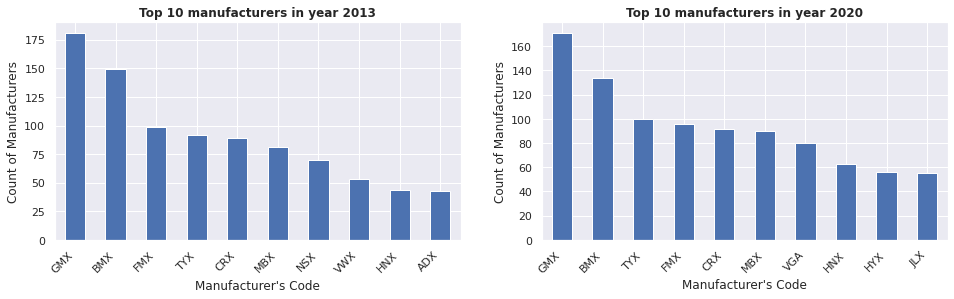

In [ ]:
df2013 = df2[df2.year==2013]
cds_count_mfr_2013 = df2013.groupby('mfrCode')['mfrCode'].count()
cds_count_mfr_2013=cds_count_mfr_2013.sort_values(ascending=False)[:10]

df2020 = df2[df2.year==2020]
cds_count_mfr_2020 = df2020.groupby('mfrCode')['mfrCode'].count()
cds_count_mfr_2020 = cds_count_mfr_2020.sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
cds_count_mfr_2013.plot(kind='bar')
plt.ylabel('Count of Manufacturers')
plt.xlabel('Manufacturer\'s Code')
plt.title('Top 10 manufacturers in year 2013', fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
cds_count_mfr_2020.plot(kind='bar')
plt.ylabel('Count of Manufacturers')
plt.xlabel('Manufacturer\'s Code')
plt.title('Top 10 manufacturers in year 2020', fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')

In the above graph, we observe the following:

*   The majority of manufacturers remained consistent over the years from 2013 to 2020. 
*   In the year 2013, the majority of vehicles were produced by ***GMX*** followed by ***BMX***, ***FMX***, ***TYX*** and so on as shown above.
*   In the year 2020, the trend of market capture by the major players such as ***GMX***, ***BMX***, ***FMX***, ***TYX*** and so on remained consistent over time. 

However, by plotting the manufacturers against the **EPA vehicle size class**, we understand that the evolution has taken place in terms of vehicle design parameters (physical design, technical design and tech-savvy innovation)
## **The following plots examine the evolution in terms of (VClass) EPA vehicle class size from the year 2013 to 2020**


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

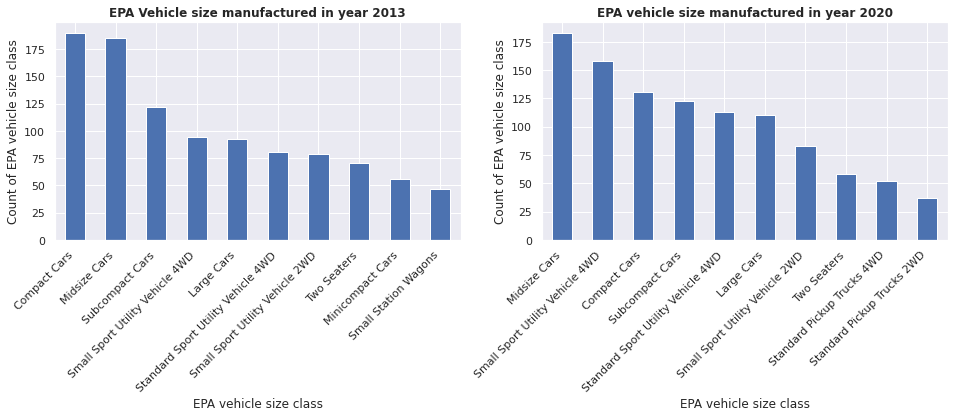

In [ ]:
dfvc2013 = df2[df2.year==2013]
cds_count_vc_2013 = dfvc2013.groupby('VClass')['VClass'].count()
cds_count_vc_2013=cds_count_vc_2013.sort_values(ascending=False)[:10]

dfvc2020 = df2[df2.year==2020]
cds_count_vc_2020 = dfvc2020.groupby('VClass')['VClass'].count()
cds_count_vc_2020=cds_count_vc_2020.sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
cds_count_vc_2013.plot(kind='bar')
plt.ylabel('Count of EPA vehicle size class')
plt.xlabel('EPA vehicle size class')
plt.title('EPA Vehicle size manufactured in year 2013', fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)
cds_count_vc_2020.plot(kind='bar')
plt.ylabel('Count of EPA vehicle size class')
plt.xlabel('EPA vehicle size class')
plt.title('EPA vehicle size manufactured in year 2020', fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')

From the above graph, we observe the following:
*   In the year **2013**, the manufacturers were keen on manufacturing ***Compact Cars*** and ***Midsize Cars*** as opposed to other smaller vehicles. This is because more people preferred compact cars because of fuel efficiency, and small family car. 
*   In the year **2020**, the trend of ***Midsize Cars*** remain almost similar to that of the one observed in the year 2013. However, we observe a drastic increment in the ***Small Sport Utility Vehicle 4WD***. 

This is apprently because of the growing trend of Hybrid vehicles among the masses due to increasing awareness about the CO2 emission and greenhouse effect. The Small Sport Utility Vehicle 4WD is a technological powerhouse which provides the comfort of Compact Cars ambience and increased MPG values.



---


# **Question 3: How has fuel economy changed over time? Are there any other interesting insights or trends?**


---





**Fuel economy** depends on various parameters, and can be determined either by ***MPG data*** or the ***EPA Fuel Economy Score***. 
The Fuel Economy Score is calculated on the ***0-10 scale*** across City and Highway MPG values to compare environmental performance across vehicle classes. Larger numbers, whether emissions score or fuel economy, are more environmentally friendly than smaller numbers. \
The following graph demonstrates the **EPA Fuel Economy Score from 2013 to 2020**:

[Text(0, 0.5, 'Fuel Economy Score'), Text(0.5, 0, 'Year')]

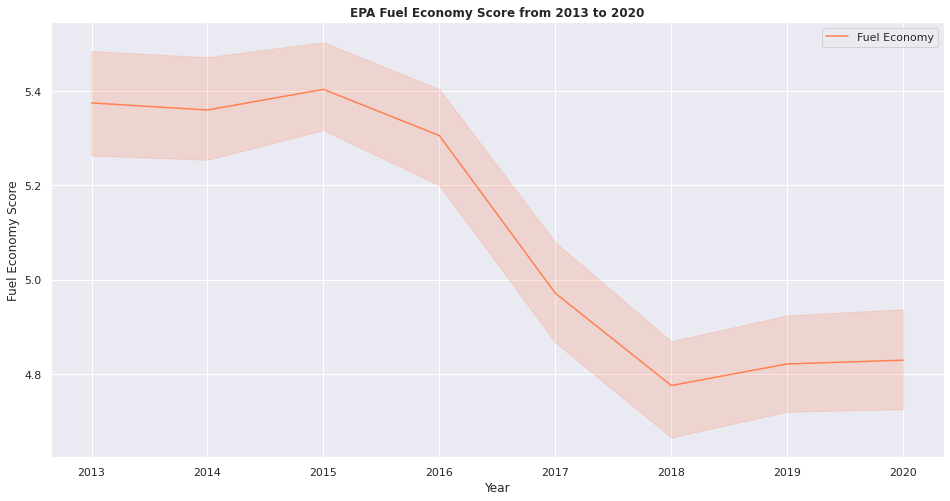

In [ ]:
q3=df2[(df2.year>=2013)&(df2.year<=2020)]
plt.figure(figsize=(16,8))
qn3 = sns.lineplot(x="year", y="feScore",color="coral", label="Fuel Economy", data=q3)
qn3.axes.set_title("EPA Fuel Economy Score from 2013 to 2020",fontweight='bold')
qn3.set(xlabel='Year', ylabel='Fuel Economy Score')

As observed from the above graph, the Fuel Economy Score experience downward trend during the year 2015 to 2018 because of reduction in Fuel prices as observed in the below graphs. From 2018 onwards, we observe slight increment in the scores which is a good indicator of environmentally friendly vehicle users.

### **The following graphs demonstrate Annual cost($) for fuel type 1 and fuel type 2 from 2013 to 2020**

[Text(0, 0.5, 'Annual cost for fuel Type 2 ($)'), Text(0.5, 0, 'Year')]

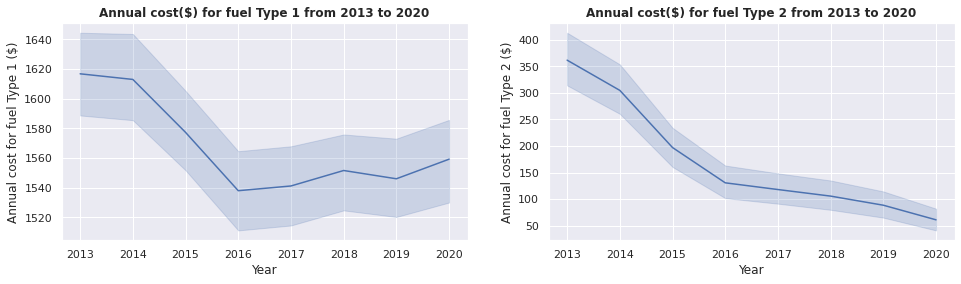

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
qn3a = sns.lineplot(x="year", y="fuelCost08", data=q3)
qn3a.axes.set_title("Annual cost($) for fuel Type 1 from 2013 to 2020",fontweight='bold')
qn3a.set(xlabel='Year', ylabel='Annual cost for fuel Type 1 ($)')
plt.subplot(1, 2, 2)
qn3b = sns.lineplot(x="year", y="fuelCostA08", data=q3)
qn3b.axes.set_title("Annual cost($) for fuel Type 2 from 2013 to 2020",fontweight='bold')
qn3b.set(xlabel='Year', ylabel='Annual cost for fuel Type 2 ($)')

# **Exploratory Data Analysis**
## **Are there any other interesting insights or trends?**
To understand other insights and trends from the dataset, we will observe the following: \
  a. EPA Fuel Economy Score across drive axle types and transmission types from 2013 to 2020 respectively \
  b. Analysis of City MPG across major transmission types over the years from 2013 to 2020 and Annual petroleum consumption in barrels for fuel type 1 based on engine cylinders \
  c. Average City MPG per manufacturer (division) for the fuel type 1 and fuel type 2 respectively \
  d. City MPG and Highway MPG based on fuel types across different transmission types respectively \

### **a. The following graphs demonstrate EPA Fuel Economy Score across drive axle types and transmission types from 2013 to 2020 respectively**

Text(0.5, 1.0, 'EPA Fuel Economy Score across transmission types from 2013 to 2020')

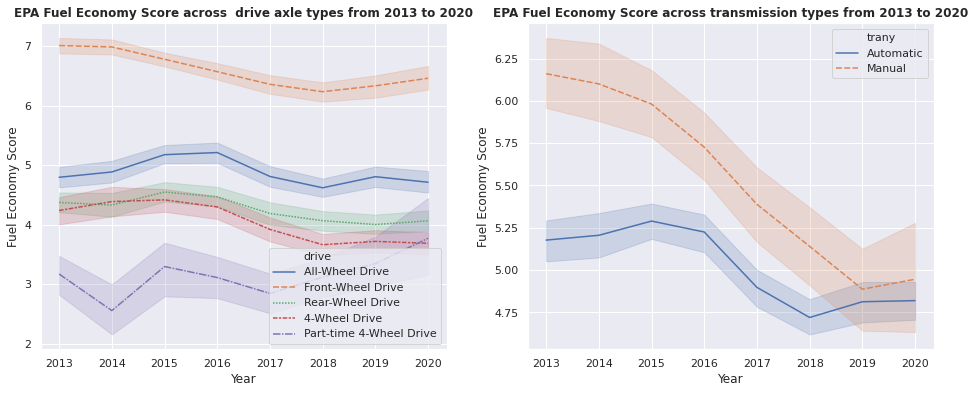

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
qn3c = sns.lineplot(x="year", y="feScore", hue="drive", style="drive",data=q3)
qn3c.set(xlabel='Year', ylabel='Fuel Economy Score')
qn3c.axes.set_title("EPA Fuel Economy Score across  drive axle types from 2013 to 2020",fontweight='bold')

plt.subplot(1, 2, 2)
qn3g = sns.lineplot(x="year", y="feScore", hue="trany", style="trany", data=q3)
qn3g.set(xlabel='Year', ylabel='Fuel Economy Score')
qn3g.axes.set_title("EPA Fuel Economy Score across transmission types from 2013 to 2020",fontweight='bold')


* In the above graph, the Fuel Economy Score is affected by the drive type during the year 2015 to 2018. This is because of the fact that the fuel prices were reduced during that period and more people preferred conventional fuel driven cars. 

* Based on the trasmission types, the Fuel Economy Score among the cars having manual trasmission has been better than the automatic trasmission. However, the Fuel Economy Score experienced a downward trend during the yeear 2015 to 2019, and we observe that it has been improving since 2019. The cars having manual transmission have more control over that of the automatic trasmission, and thus, the Fuel Economy Score has been good in cars having Manual trasmission.

### **b. Analysis of City MPG across major transmission types over the years from 2013 to 2020, and Annual petroleum consumption in barrels for fuel type 1 based on engine cylinders**

Text(0.5, 1.0, 'Annual petroleum consumption in barrels vs Enginer Cylinders')

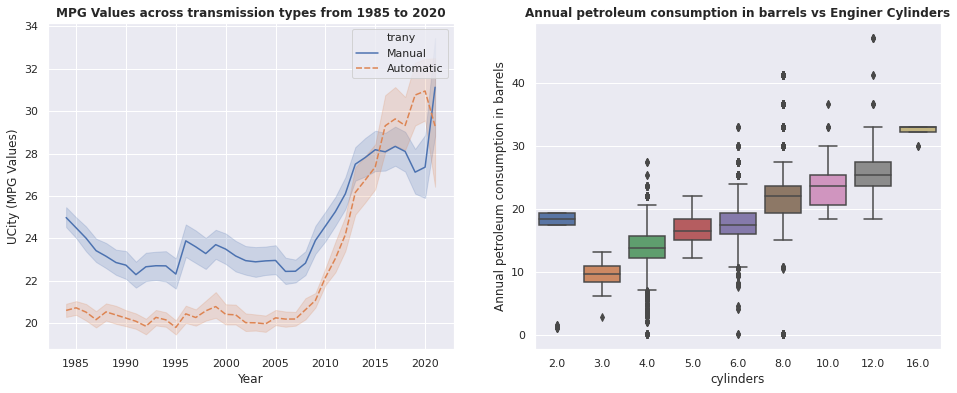

In [ ]:
#plots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
qn3l = sns.lineplot(x="year", y="UCity", hue="trany", style="trany", data=df2)
qn3l.set(xlabel='Year', ylabel='UCity (MPG Values)')
qn3l.axes.set_title("MPG Values across transmission types from 1985 to 2020",fontweight='bold')

plt.subplot(1, 2, 2)
qn3m=sns.boxplot(x="cylinders", y="barrels08", data=df2)
qn3m.set(xlabel='cylinders', ylabel='Annual petroleum consumption in barrels')
qn3m.axes.set_title("Annual petroleum consumption in barrels vs Enginer Cylinders",fontweight='bold')

From the above graphs, we observe the following:

*   The City MPG has been improving over the years from 1985 to 2020.
*   From 1985 to 2015, the cars having Automatic transmission had less MPG values in contrast to the cars having Manual transmission.
*   From 2015 onwards, the cars having Automatic transmission have been performing increasingly good in terms of MPG values when compared to the cars having Manual transmission. This is also because of the fact that more users are prefering cars with Automatic transmission, and thus, there are more cars of latter type in the dataset.
*   As the number of cylinders in the engine increases, the petroleum consumption increases. As analyzed earlier, it's evident that the maximum MPG values can be obtained for the engine having 3 cylinders, followed by 4 and 6 cylinders.



In [ ]:
#plt.figure(figsize=(16,4))
#plt.subplot(1, 2, 1)
#qn3d = sns.barplot(x="fuelType", y="feScore", data=q3)
#qn3d.set_xticklabels(qn3d.get_xticklabels(), rotation=60, horizontalalignment='right')
#plt.subplot(1, 2, 2)
#qn3f = sns.barplot(x="VClass", y="feScore", data=q3)
#qn3f.set_xticklabels(qn3f.get_xticklabels(), rotation=60, horizontalalignment='right')
#plt.figure(figsize=(16,4))
#qn3h = sns.lineplot(x="cylinders", y="feScore", data=q3)

### **c. Average City MPG per manufacturer (division) for the fuel type 1 and fuel type 2 respectively**

The following analysis gives the top 5 manufacturers (division) which have the best city MPG for the two major fuel types. The graphical representation provides clear idea about the same.

In [ ]:
var_UCity = df.groupby('make')['UCity'].mean()
var_UCity.sort_values(ascending=False).head(5)

make
Tesla              138.309677
smart              113.955046
CODA Automotive    110.300000
BYD                 98.866667
Fiat                46.912221
Name: UCity, dtype: float64

In [ ]:
var_UCityA = df.groupby('make')['UCityA'].mean()
var_UCityA.sort_values(ascending=False).head(5)

make
Karma       90.433333
Chrysler    12.224047
Volvo        7.681871
Ford         6.351474
BMW          4.955066
Name: UCityA, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

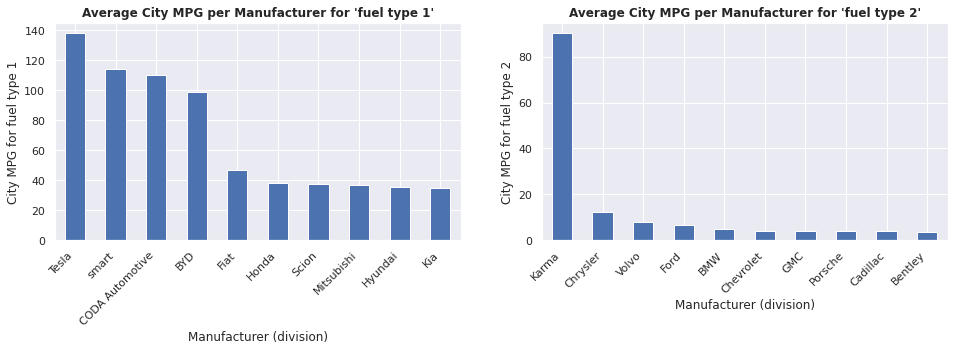

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
var_UCity.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('City MPG for fuel type 1')
plt.xlabel('Manufacturer (division)')
plt.title('Average City MPG per Manufacturer for \'fuel type 1\'', fontweight = 'bold')
plt.xticks(rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
var_UCityA.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('City MPG for fuel type 2')
plt.xlabel('Manufacturer (division)')
plt.title('Average City MPG per Manufacturer for \'fuel type 2\'', fontweight = 'bold')
plt.xticks(rotation=45, horizontalalignment='right')

From the above graph, we observe the following:
*   For the **fuel type 1**, Tesla gives the maximum City MPG followed by smart, CODA Automative, BYD, Fiat, Honda and so on.
*   For the **fuel type 2**, Karma gives the maximum City MPG followed by Crystler, Volvo, Ford, BMW and so on.

### **d. City MPG and Highway MPG based on fuel types across different transmission types respectively**
In the following analysis, we create a different dataframe to capture the insights from two different columns of the previous dataframe, and merge the columns together for comparative analysis. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

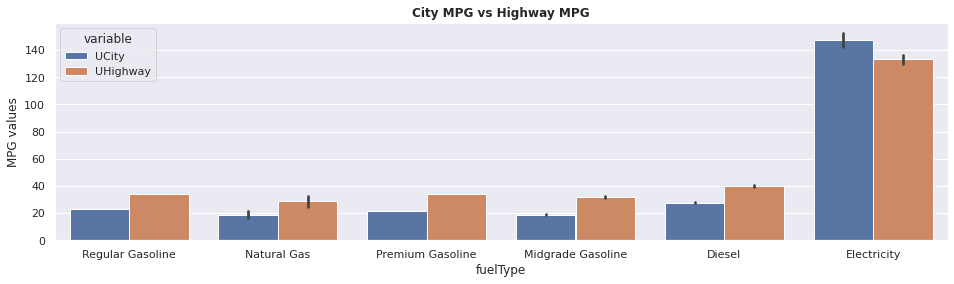

In [ ]:
CityHighway = pd.DataFrame({'fuelType': df2['fuelType1'],
                   'UCity': df2['UCity'],
                   'UHighway': df2['UHighway']},
                    columns = ['fuelType','UCity','UHighway'])

CH1 = pd.melt(CityHighway, id_vars=['fuelType']).sort_values(['variable','value'])
plt.figure(figsize=(16,4))
sns.barplot(x='fuelType', y='value', hue='variable', data=CH1)
plt.xticks(rotation=90)
plt.ylabel('MPG values')
plt.title('City MPG vs Highway MPG', fontweight = 'bold')
plt.xticks(rotation=0)


From the above graph, it is evident that the **hybrid vehicles (Electricity)** get better gas mileage in the city than they do in highway driving. This is because driving in the city requires frequent starts and stops due to traffic and traffic speed control methods. \
Hence, we observe that in case of Electricity fuel type, the blue colored bar (**City MPG**) is taller than the brown colored bar (**Highway MPG**), whereas it's the opposite in every other case. Also, the interesting fact is that the hybrid cars give high MPG values due to reduced emission and workload respectively.

```
Contributed by: Khalid Shaikh Qamar 
Student ID: 20801907 
University: University of Waterloo  
Contact: 548-333-6090
Email: kshaikhq@uwaterloo.ca
```

